In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
panda = pd.read_excel("lp3.xlsx")
pd1 = (panda['position']).dropna().to_list()
pd2 = panda[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].dropna()
arr = np.array(pd2).flatten().reshape(47,90)
df = pd.DataFrame(arr)
df['position'] = pd1
df.to_csv("third_dataset.csv")

In [2]:
df = pd.read_csv('third_dataset.csv')
# split into X and Y
X = df.drop(['position'], axis=1)
Y = df['position']

# convert to numpy arrays
X = np.array(X)

(array([20.,  0.,  0., 15.,  0.,  0.,  9.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

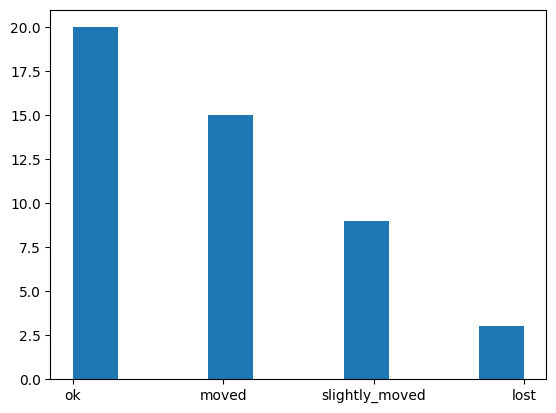

In [3]:
plt.hist(df['position'])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2)

Naive bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df["position"] = (df["position"] == "lost").astype(int)
df["position"] = (df["position"] == "moved").astype(int)
df["position"] = (df["position"] == "ok").astype(int)
df["position"] = (df["position"] == "slightly_moved").astype(int)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.25)
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          lost       0.00      0.00      0.00         1
         moved       0.60      1.00      0.75         3
            ok       1.00      0.83      0.91         6
slightly_moved       0.50      0.50      0.50         2

      accuracy                           0.75        12
     macro avg       0.53      0.58      0.54        12
  weighted avg       0.73      0.75      0.73        12



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

KNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       0.78      1.00      0.88         7
           3       0.00      0.00      0.00         1

   micro avg       0.80      0.67      0.73        12
   macro avg       0.44      0.38      0.39        12
weighted avg       0.62      0.67      0.62        12
 samples avg       0.67      0.67      0.67        12



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Artifical neural network

In [17]:
Y.head()

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, dummy_y , test_size=0.25)

In [24]:
# build a model
model = Sequential()
model.add(Dense(200, input_shape=(x_train.shape[1],), activation='relu'))# input shape is (features,)
model.add(Dense(4, activation='softmax'))


# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [25]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=20000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=0)

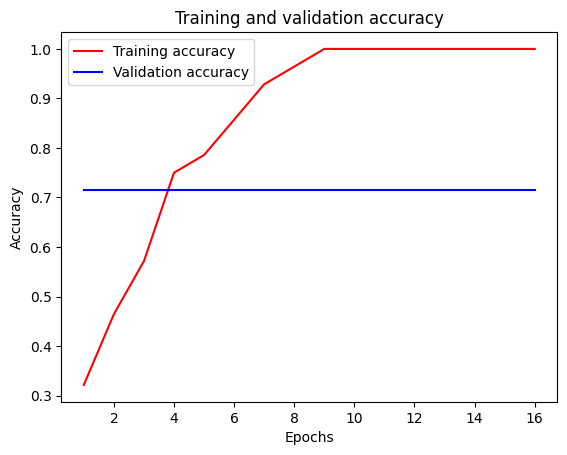

In [26]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(x_test) # see how the model did!
print(y_pred[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(y_pred[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y



# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

1/1 [==============================] - 0s 46ms/step
[1.1699846e-11 9.6939394e-04 9.9902999e-01 6.8213080e-07]
1.0000001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         2
           2       1.00      0.86      0.92         7
           3       0.33      1.00      0.50         1

    accuracy                           0.75        12
   macro avg       0.50      0.71      0.56        12
weighted avg       0.72      0.75      0.71        12



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [34]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[1, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 0, 7, 0],
       [0, 0, 1, 0]], dtype=int64)